In [52]:
import numpy as np
import math
from abc import ABC, abstractmethod
from numpy.random import default_rng
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression





In [54]:
rng = default_rng(seed=0)


# Generating  Data

In [55]:
## Generate data points
class Data2D:
    
    def __init__(self, slope = (1, 1), noise_variance = 1 ):
        
        # intialize member variables here 
        self.slope = slope
        self.noise_variance = noise_variance
        
        
        
    def generate_points(self, N = 50):
    
        slope = self.slope
        noise_variance = self.noise_variance

        # initialize noise epsilon 
        epsilon = rng.normal(0, noise_variance**(1/2), N)

        ## Generate N points

        # Adding the X_0 coordinates full of ones for vector multiplications
        X_0 = np.ones(N)
        # for X_1 generate random points between -15,15
        X_1 = 30*(np.random.random(N)-0.5)

        # We create a design matrix, where rows are datapoints and columns are features, or input dimensions
        X = np.vstack( [X_0, X_1]).transpose()

        # initialize **y** with the equation of line here. Equation of line is written in the desciption above, 
        # line parameters (a,b, c) are stored in a local variable

        y = X.dot(np.array(slope)) + epsilon

        return X, y

    def generate_outliers(self, N):
        pass 

    

        
     
     
   


    


## Scatter plot
## Scatter residual plot
## Check Leverage points video

In [56]:
def generate_data(slope = (1,1), noise_variance=1, N = 50):
    
    # initialize noise epsilon 
    epsilon = rng.normal(0, noise_variance**(1/2), N)
    
    ## Generate N points
    
    # Adding the X_0 coordinates full of ones for vector multiplications
    X_0 = np.ones(N)
    # for X_1 generate random points between -15,15
    X_1 = 30*(np.random.random(N)-0.5)
    
    # We create a design matrix, where rows are datapoints and columns are features, or input dimensions
    X = np.vstack( [X_0, X_1]).transpose()
    
    # initialize **y** with the equation of line here. Equation of line is written in the desciption above, 
    # line parameters (a,b, c) are stored in a local variable

    y = X.dot(np.array(slope)) + epsilon
    
    return X, y

  


In [57]:
def regression(X, y) :
    reg = LinearRegression().fit(X.reshape(-1,1), y)
    
    return reg.coef_[0], reg.intercept_, reg.score(X, y)

    

Regression slope : 1.998 Regression intercept : -0.839 Regression score : 0.987


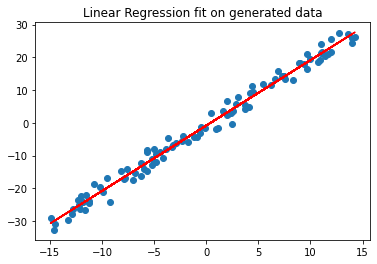

In [58]:
s = (-1,2)
X, y = generate_data(s, 4, 100)
a, b, c = regression(X[:,1].reshape(-1,1), y)
print('Regression slope : %.3f' % a, 'Regression intercept : %.3f' % b, 'Regression score : %.3f' % c)
plt.plot(X[:,1],a*X[:,1]+b, c='red')
plt.scatter(X[:,1],y)
plt.title('Linear Regression fit on generated data')
plt.show();

In [59]:
## Adding one outlier
outlier = (20,0)
Xo = np.append(X[:,1],outlier[0])
yo = np.append(y,outlier[1])



Regression slope : 1.890 Regression intercept : -1.255 Regression score : 0.936


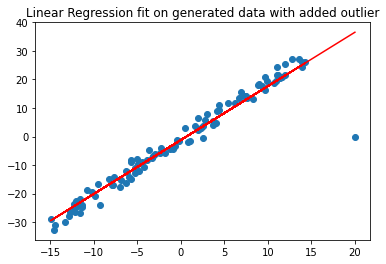

In [60]:
a, b, c = regression(Xo.reshape(-1,1), yo)
print('Regression slope : %.3f' % a, 'Regression intercept : %.3f' % b, 'Regression score : %.3f' % c)
plt.plot(Xo,a*Xo+b, c='red')
plt.scatter(Xo,yo)
plt.title('Linear Regression fit on generated data with added outlier')

plt.show();

Regression slope : 1.627 Regression intercept : -0.496 Regression score : 0.860
The outlier is : (-50, -30)
The outlier distance from the green line is : 31.75
The outlier distance from the red line is : 27.15


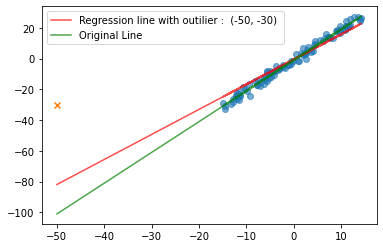

Regression slope : 1.697 Regression intercept : -0.513 Regression score : 0.888
The outlier is : (-45, -30)
The outlier distance from the green line is : 27.28
The outlier distance from the red line is : 23.80


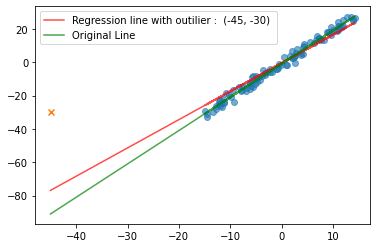

Regression slope : 1.764 Regression intercept : -0.539 Regression score : 0.915
The outlier is : (-40, -30)
The outlier distance from the green line is : 22.81
The outlier distance from the red line is : 20.26


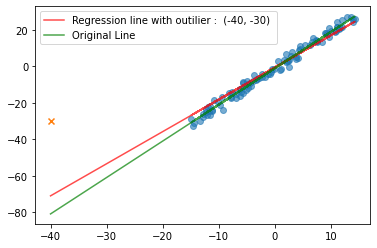

Regression slope : 1.826 Regression intercept : -0.575 Regression score : 0.938
The outlier is : (-35, -30)
The outlier distance from the green line is : 18.34
The outlier distance from the red line is : 16.56


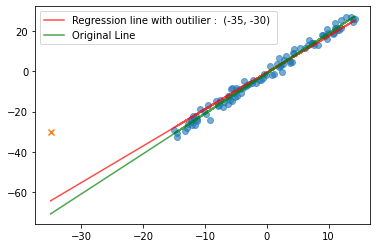

Regression slope : 1.882 Regression intercept : -0.623 Regression score : 0.958
The outlier is : (-30, -30)
The outlier distance from the green line is : 13.86
The outlier distance from the red line is : 12.71


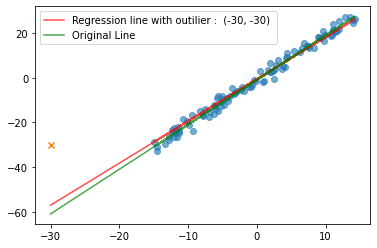

Regression slope : 1.931 Regression intercept : -0.681 Regression score : 0.974
The outlier is : (-25, -30)
The outlier distance from the green line is : 9.39
The outlier distance from the red line is : 8.71


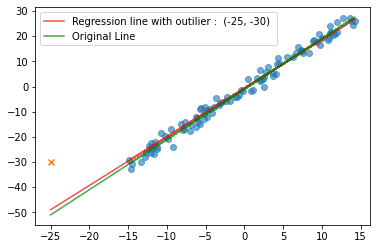

Regression slope : 1.969 Regression intercept : -0.751 Regression score : 0.983
The outlier is : (-20, -30)
The outlier distance from the green line is : 4.92
The outlier distance from the red line is : 4.59


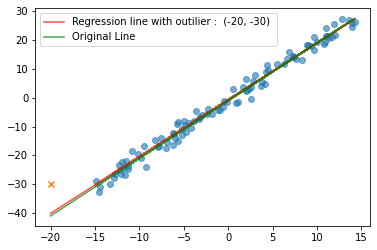

Regression slope : 1.996 Regression intercept : -0.832 Regression score : 0.987
The outlier is : (-15, -30)
The outlier distance from the green line is : 0.45
The outlier distance from the red line is : 0.35


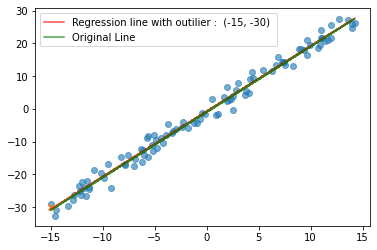

Regression slope : 2.010 Regression intercept : -0.923 Regression score : 0.984
The outlier is : (-10, -30)
The outlier distance from the green line is : 4.02
The outlier distance from the red line is : 4.00


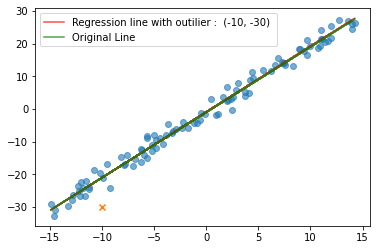

Regression slope : 2.010 Regression intercept : -1.022 Regression score : 0.975
The outlier is : (-5, -30)
The outlier distance from the green line is : 8.50
The outlier distance from the red line is : 8.43


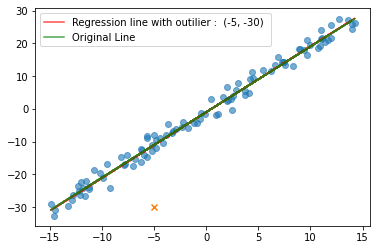

Regression slope : 1.996 Regression intercept : -1.129 Regression score : 0.958
The outlier is : (0, -30)
The outlier distance from the green line is : 12.97
The outlier distance from the red line is : 12.93


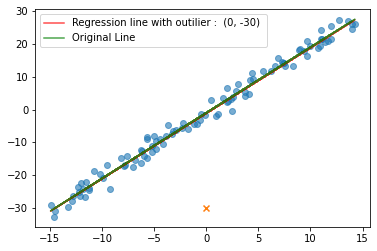

Regression slope : 1.967 Regression intercept : -1.239 Regression score : 0.935
The outlier is : (5, -30)
The outlier distance from the green line is : 17.44
The outlier distance from the red line is : 17.49


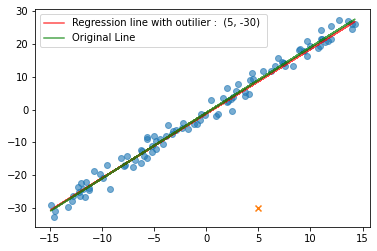

Regression slope : 1.925 Regression intercept : -1.352 Regression score : 0.906
The outlier is : (10, -30)
The outlier distance from the green line is : 21.91
The outlier distance from the red line is : 22.08


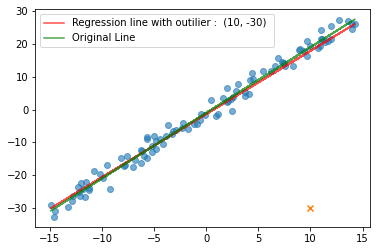

Regression slope : 1.871 Regression intercept : -1.465 Regression score : 0.871
The outlier is : (15, -30)
The outlier distance from the green line is : 26.39
The outlier distance from the red line is : 26.68


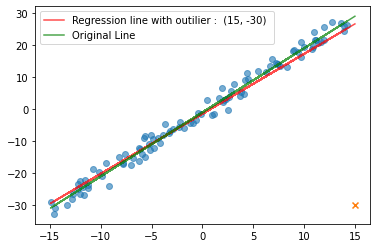

Regression slope : 1.807 Regression intercept : -1.575 Regression score : 0.832
The outlier is : (20, -30)
The outlier distance from the green line is : 30.86
The outlier distance from the red line is : 31.26


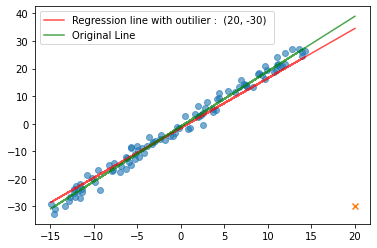

Regression slope : 1.734 Regression intercept : -1.680 Regression score : 0.791
The outlier is : (25, -30)
The outlier distance from the green line is : 35.33
The outlier distance from the red line is : 35.80


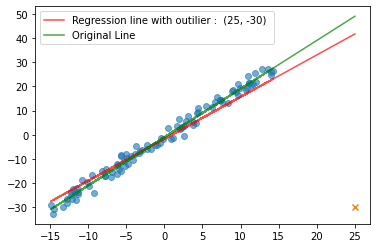

Regression slope : 1.655 Regression intercept : -1.780 Regression score : 0.747
The outlier is : (30, -30)
The outlier distance from the green line is : 39.80
The outlier distance from the red line is : 40.27


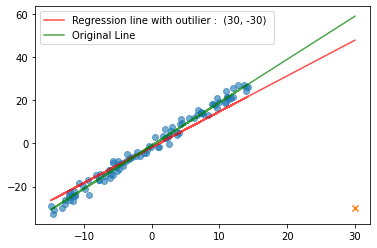

Regression slope : 1.572 Regression intercept : -1.872 Regression score : 0.701
The outlier is : (35, -30)
The outlier distance from the green line is : 44.27
The outlier distance from the red line is : 44.63


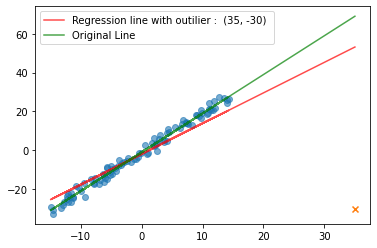

Regression slope : 1.487 Regression intercept : -1.956 Regression score : 0.656
The outlier is : (40, -30)
The outlier distance from the green line is : 48.75
The outlier distance from the red line is : 48.84


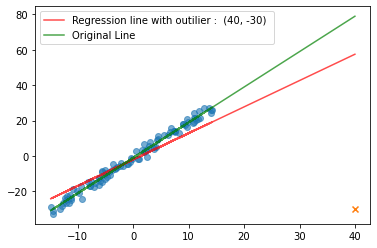

Regression slope : 1.401 Regression intercept : -2.031 Regression score : 0.611
The outlier is : (45, -30)
The outlier distance from the green line is : 53.22
The outlier distance from the red line is : 52.88


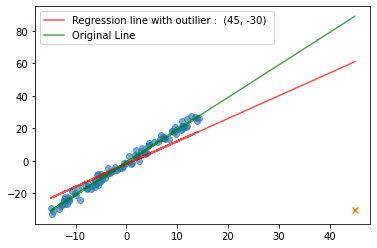

In [61]:
## Studying the impact of adding one outlier on randomly generated data with one outlier
## Each time we change the outlier and see what happens
slopes = []
intercepts = []
reg_score = []
distances = []
for i in range(100):
    outlier = (-50+i, -30)
    Xo = np.append(X[:,1],outlier[0])
    yo = np.append(y,outlier[1])
    slope, intercept, score = regression(Xo.reshape(-1,1), yo)
    slopes.append(slope)
    intercepts.append(intercept)
    reg_score.append(score)
    a = s[1]
    b = s[0]
    distance = np.absolute((a*outlier[0]+b-outlier[1])/(np.sqrt(a**2+1)))
    distance_reg = np.absolute((slope*outlier[0]+intercept-outlier[1])/(np.sqrt(slope**2+1)))
    distances.append(distance)
    if i%5 == 0 :
        print('Regression slope : %.3f' % slope, 'Regression intercept : %.3f' % intercept, 'Regression score : %.3f' % score)
        print('The outlier is :', outlier)
        print('The outlier distance from the green line is : %.2f' % distance)
        print('The outlier distance from the red line is : %.2f' % distance_reg)
        z = np.ones(len(y)+1)
        z[len(y)] = 0
        plt.plot(Xo,slope*Xo+intercept, c='red', label = f'Regression line with outilier :  {outlier} ', alpha = 0.7)
        plt.plot(Xo,a*Xo+b, c='green', label = f'Original Line', alpha = 0.7)
        plt.scatter(Xo[:len(y)],yo[:len(y)], marker = 'o', cmap='Spectral', alpha = 0.6 )
        plt.scatter(Xo[len(y)],yo[len(y)], marker = 'x', cmap='summer')
        plt.legend(loc = 'upper left')
        plt.show();
    
    
    

## Conclusion :

The outlier pulls the line towards it. The further the outlier is from the line the stronger the pull, and the strong it's effect on the regression score.

# How to detect outliers ? 

Outliers are the points most distant to the line, let's look at an example

### Generating Data

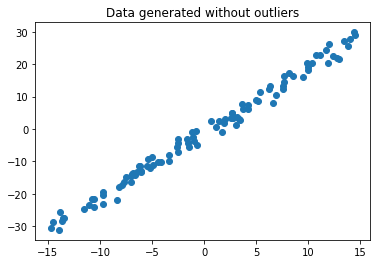

In [62]:
## Lets generate some points

data = Data2D(s, 3)
X, y = data.generate_points(100)
plt.scatter(X[:,1],y)
plt.title('Data generated without outliers')
plt.show();

### Adding outliers

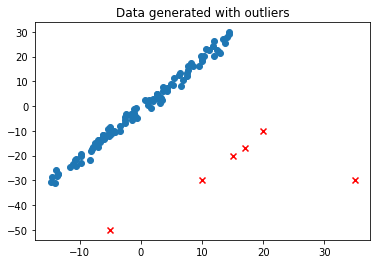

In [63]:
## Adding 6 outliers
outliers = [(20,-10), (35,-30), (17,-17), (10,-30), (-5, -50), (15,-20)]
x_outliers = np.array([outliers[i][0] for i in range(len(outliers))])
y_outliers = np.array([outliers[i][1] for i in range(len(outliers))])

Xo = np.concatenate((X[:,1],x_outliers), axis=0)
yo = np.concatenate((y,y_outliers), axis=0)

plt.scatter(X[:,1],y)
plt.scatter(x_outliers,y_outliers, c='red', marker='x')
plt.title('Data generated with outliers')
plt.show();


Regression slope : 1.991 Regression intercept : -1.087 Regression score : 0.990
Outliers Regression slope : 1.310 Outliers Regression intercept : -3.607 Outliers Regression score : 0.485


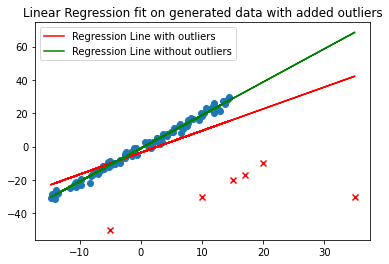

In [64]:
a, b, c = regression(Xo.reshape(-1,1), yo)
a1, b1, c1 = regression(X[:,1].reshape(-1,1), y)
print('Regression slope : %.3f' % a1, 'Regression intercept : %.3f' % b1, 'Regression score : %.3f' % c1)
print('Outliers Regression slope : %.3f' % a, 'Outliers Regression intercept : %.3f' % b, 'Outliers Regression score : %.3f' % c)
plt.plot(Xo,a*Xo+b, c='red', label='Regression Line with outliers')
plt.plot(Xo,a1*Xo+b1, c='green', label='Regression Line without outliers')
plt.legend(loc='upper left')
plt.scatter(X[:,1],y)
plt.scatter(x_outliers,y_outliers, c='red', marker='x')
plt.title('Linear Regression fit on generated data with added outliers')
plt.show();

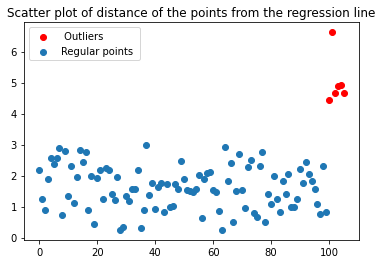

In [65]:
## Checking distance of the points from the fitted line
### We use the line fitted with outliers supposing that we havent removed them yet

distances = []
for i in range(len(yo)):
    distance = np.absolute((a*Xo[i]+b-yo[i])/(np.sqrt(a**2+1)))
    distances.append(distance)

norms = [np.sqrt(x) for x in distances]
points = np.arange(len(yo))
plt.scatter(points[-6:], norms[-6:], c='red', label=' Outliers ')
plt.scatter(points[:-6], norms[:-6], label = 'Regular points ')
plt.legend()
plt.title('Scatter plot of distance of the points from the regression line')
plt.show();

## Metrics for defining an outlier :

We will say that a point is an outlier if it is located further than two standard deviations above or below the best-fit line as an outlier : 

$y$ outlier if : 
<center> $y-\widehat{y}> 2 \sqrt{\frac{SSE}{n-2}}$ </center>

With $n$ number of data points and SSE is sum of squared errors.




Resources : (https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(OpenStax)/12%3A_Linear_Regression_and_Correlation/12.07%3A_Outliers)

For the example before we compute $ s =  2 \sqrt{\frac{SSE}{n-2}}$ first.

Let's visualise the regression line fit along with the line limiting the boundary of outliers.

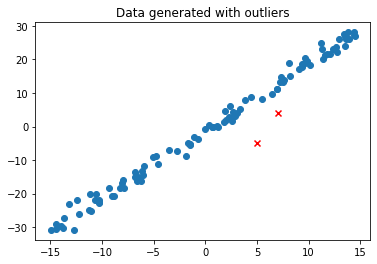

In [66]:
s = (-1,2)
X, y = generate_data(s, 2, 100)

## Adding one outlier
outliers = [(5,-5),(7,4)]
x_outliers = np.array([outliers[i][0] for i in range(len(outliers))])
y_outliers = np.array([outliers[i][1] for i in range(len(outliers))])
Xo = np.concatenate((X[:,1],x_outliers), axis=0)
yo = np.concatenate((y,y_outliers), axis=0)
plt.scatter(X[:,1],y)
plt.scatter(x_outliers,y_outliers, c='red', marker='x')
plt.title('Data generated with outliers')
plt.show();



Regression slope : 1.987 Regression intercept : -1.408 Regression score : 0.985


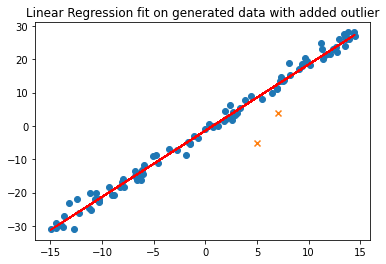

In [67]:
a, b, c = regression(Xo.reshape(-1,1), yo)
print('Regression slope : %.3f' % a, 'Regression intercept : %.3f' % b, 'Regression score : %.3f' % c)
plt.plot(Xo,a*Xo+b, c='red')
plt.scatter(Xo[:-2],yo[:-2])
plt.scatter(Xo[-2:],yo[-2:], marker='x')
plt.title('Linear Regression fit on generated data with added outlier')
plt.show();

In [68]:
## Lets compute s

squared_errors = [(a*Xo[i]+b-yo[i])**2 for i in range(len(yo))]

sse = sum(squared_errors)

s = np.sqrt(sse/(len(yo)-2))

print('s : %.2f' % s)



s : 2.26


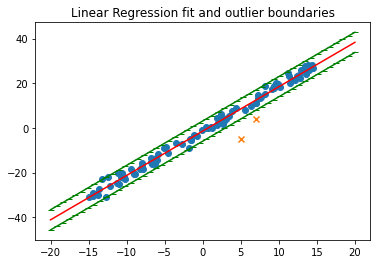

In [69]:
## Lets plot the decision boundary for outliers

x = np.linspace(-20,20,50)
plt.plot(x,a*x+b, c='red')
plt.plot(x,a*x+b+2*s, c='green',  marker="_")
plt.plot(x,a*x+b-2*s, c='green',  marker="_" )
plt.scatter(Xo[:-2],yo[:-2])
plt.scatter(Xo[-2:],yo[-2:], marker='x')
plt.title('Linear Regression fit and outlier boundaries')
plt.show();


We can also detect outliers by computing the residual errors.

In [71]:
indices = []

for i in range(len(yo)) :
    if np.absolute(a*Xo[i]+b-yo[i]) > 2*s :
        indices.append(i)
        
print(indices)

[19, 100, 101]


## Impact of number of outliers on the Regression

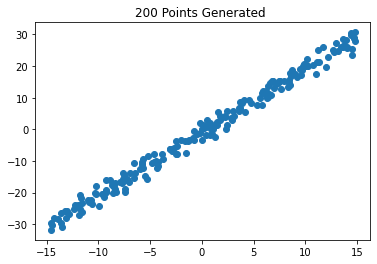

In [77]:
### Generating Data Points
s=(-1,2)
data = Data2D(s, 3)
X,y = data.generate_points(200)
title = '200 Points Generated '
plt.title(title)
plt.scatter(X[:,1],y);

Regression slope : 2.003 Regression intercept : -0.845 Regression score : 0.989
Original line slope : 2.000 Original line intercept : -1.000


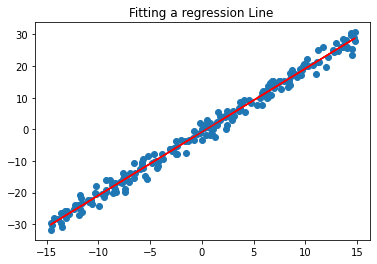

In [79]:
## Fitting the regression line and printig the parameters
a, b, c = regression(X[:,1].reshape(-1,1), y)
print('Regression slope : %.3f' % a, 'Regression intercept : %.3f' % b, 'Regression score : %.3f' % c)
print('Original line slope : %.3f' % s[1], 'Original line intercept : %.3f' % s[0])

plt.plot(X,a*X+b, c='red')
title = 'Fitting a regression Line '
plt.title(title)
plt.scatter(X[:,1],y)
plt.show();

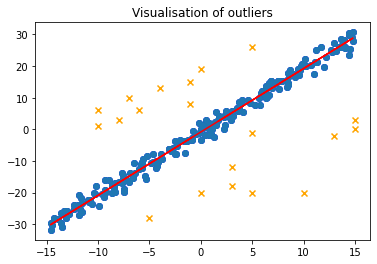

In [84]:
## Defining a list of 20 outlier
outliers = [(0,-20), (0,19), (5,-20), (5,26), (-5, -28), (10,-20),(15,0),(-10,6),(3,-18),(-6,6),(-1,8),(-7,10),(-1,15),(-10,1),(-4,13),(-8,3),(5,-1),(13,-2),(15,3),(3,-12)]
x_outliers = np.array([outliers[i][0] for i in range(len(outliers))])
y_outliers = np.array([outliers[i][1] for i in range(len(outliers))])
Xo = np.concatenate((X[:,1],x_outliers), axis=0)
yo = np.concatenate((y,y_outliers), axis=0)

plt.scatter(X[:,1],y, c='blue')
plt.scatter(x_outliers,y_outliers, c='orange', marker='x')
plt.plot(X,a*X+b, c='red')
plt.scatter(X[:,1],y)
title = 'Visualisation of outliers'
plt.title(title)
plt.show();


After adding 1 outliers : 
Original line slope : 2.000 , Original line intercept : -1.000
Original Regression slope : 2.003 , Outliers Regression slope : 2.004
Original Regression intercept : -0.845 , Outliers Regression intercept : -0.940
Original Regression score : 0.989 , Outliers Regression score : 0.983


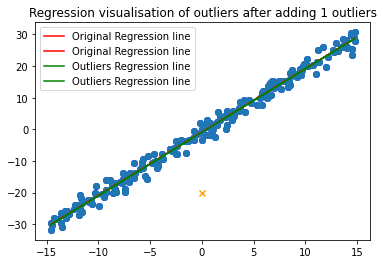

After adding 2 outliers : 
Original line slope : 2.000 , Original line intercept : -1.000
Original Regression slope : 2.003 , Outliers Regression slope : 2.003
Original Regression intercept : -0.845 , Outliers Regression intercept : -0.842
Original Regression score : 0.989 , Outliers Regression score : 0.977


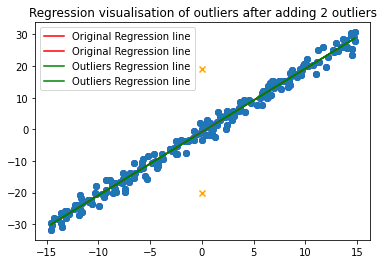

After adding 3 outliers : 
Original line slope : 2.000 , Original line intercept : -1.000
Original Regression slope : 2.003 , Outliers Regression slope : 1.994
Original Regression intercept : -0.845 , Outliers Regression intercept : -0.983
Original Regression score : 0.989 , Outliers Regression score : 0.962


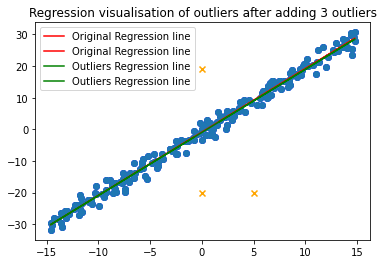

After adding 4 outliers : 
Original line slope : 2.000 , Original line intercept : -1.000
Original Regression slope : 2.003 , Outliers Regression slope : 1.999
Original Regression intercept : -0.845 , Outliers Regression intercept : -0.901
Original Regression score : 0.989 , Outliers Regression score : 0.958


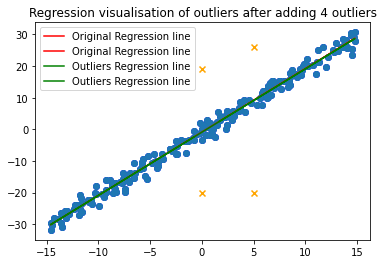

After adding 5 outliers : 
Original line slope : 2.000 , Original line intercept : -1.000
Original Regression slope : 2.003 , Outliers Regression slope : 2.006
Original Regression intercept : -0.845 , Outliers Regression intercept : -0.986
Original Regression score : 0.989 , Outliers Regression score : 0.954


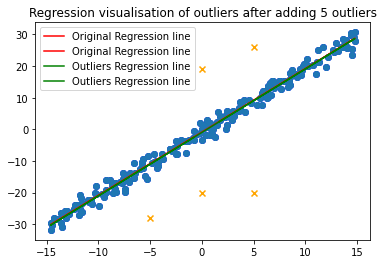

After adding 6 outliers : 
Original line slope : 2.000 , Original line intercept : -1.000
Original Regression slope : 2.003 , Outliers Regression slope : 1.979
Original Regression intercept : -0.845 , Outliers Regression intercept : -1.168
Original Regression score : 0.989 , Outliers Regression score : 0.929


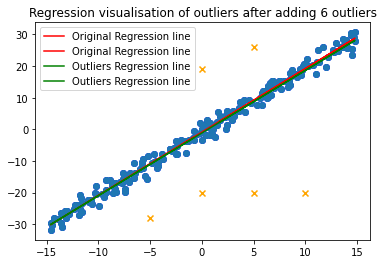

After adding 7 outliers : 
Original line slope : 2.000 , Original line intercept : -1.000
Original Regression slope : 2.003 , Outliers Regression slope : 1.951
Original Regression intercept : -0.845 , Outliers Regression intercept : -1.296
Original Regression score : 0.989 , Outliers Regression score : 0.916


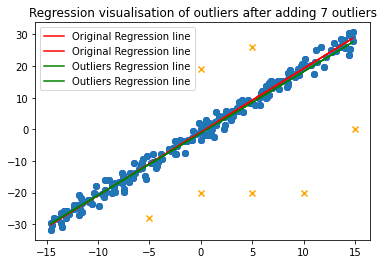

After adding 8 outliers : 
Original line slope : 2.000 , Original line intercept : -1.000
Original Regression slope : 2.003 , Outliers Regression slope : 1.932
Original Regression intercept : -0.845 , Outliers Regression intercept : -1.161
Original Regression score : 0.989 , Outliers Regression score : 0.905


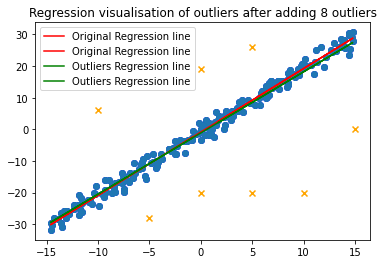

After adding 9 outliers : 
Original line slope : 2.000 , Original line intercept : -1.000
Original Regression slope : 2.003 , Outliers Regression slope : 1.928
Original Regression intercept : -0.845 , Outliers Regression intercept : -1.268
Original Regression score : 0.989 , Outliers Regression score : 0.897


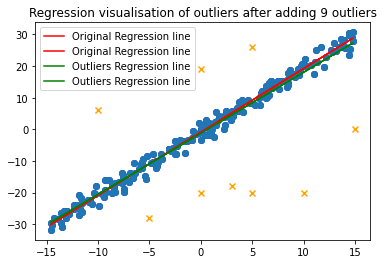

After adding 10 outliers : 
Original line slope : 2.000 , Original line intercept : -1.000
Original Regression slope : 2.003 , Outliers Regression slope : 1.920
Original Regression intercept : -0.845 , Outliers Regression intercept : -1.176
Original Regression score : 0.989 , Outliers Regression score : 0.891


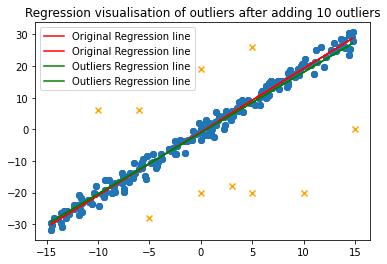

After adding 11 outliers : 
Original line slope : 2.000 , Original line intercept : -1.000
Original Regression slope : 2.003 , Outliers Regression slope : 1.919
Original Regression intercept : -0.845 , Outliers Regression intercept : -1.123
Original Regression score : 0.989 , Outliers Regression score : 0.889


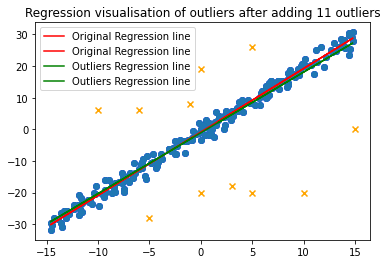

After adding 12 outliers : 
Original line slope : 2.000 , Original line intercept : -1.000
Original Regression slope : 2.003 , Outliers Regression slope : 1.907
Original Regression intercept : -0.845 , Outliers Regression intercept : -1.004
Original Regression score : 0.989 , Outliers Regression score : 0.880


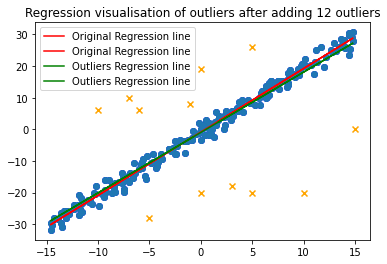

After adding 13 outliers : 
Original line slope : 2.000 , Original line intercept : -1.000
Original Regression slope : 2.003 , Outliers Regression slope : 1.906
Original Regression intercept : -0.845 , Outliers Regression intercept : -0.920
Original Regression score : 0.989 , Outliers Regression score : 0.875


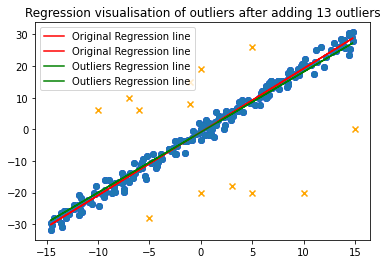

After adding 14 outliers : 
Original line slope : 2.000 , Original line intercept : -1.000
Original Regression slope : 2.003 , Outliers Regression slope : 1.892
Original Regression intercept : -0.845 , Outliers Regression intercept : -0.819
Original Regression score : 0.989 , Outliers Regression score : 0.868


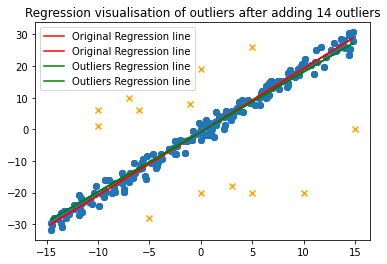

After adding 15 outliers : 
Original line slope : 2.000 , Original line intercept : -1.000
Original Regression slope : 2.003 , Outliers Regression slope : 1.886
Original Regression intercept : -0.845 , Outliers Regression intercept : -0.718
Original Regression score : 0.989 , Outliers Regression score : 0.861


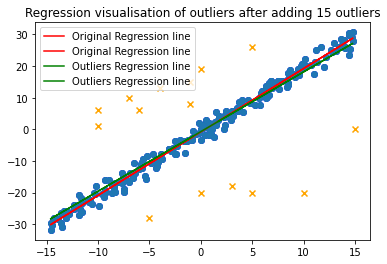

After adding 16 outliers : 
Original line slope : 2.000 , Original line intercept : -1.000
Original Regression slope : 2.003 , Outliers Regression slope : 1.875
Original Regression intercept : -0.845 , Outliers Regression intercept : -0.630
Original Regression score : 0.989 , Outliers Regression score : 0.856


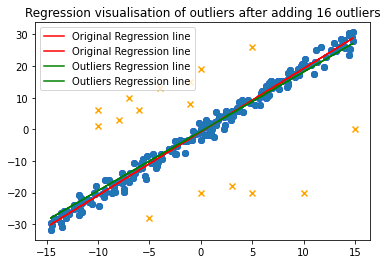

After adding 17 outliers : 
Original line slope : 2.000 , Original line intercept : -1.000
Original Regression slope : 2.003 , Outliers Regression slope : 1.872
Original Regression intercept : -0.845 , Outliers Regression intercept : -0.674
Original Regression score : 0.989 , Outliers Regression score : 0.854


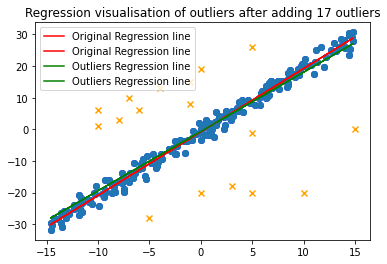

After adding 18 outliers : 
Original line slope : 2.000 , Original line intercept : -1.000
Original Regression slope : 2.003 , Outliers Regression slope : 1.851
Original Regression intercept : -0.845 , Outliers Regression intercept : -0.787
Original Regression score : 0.989 , Outliers Regression score : 0.844


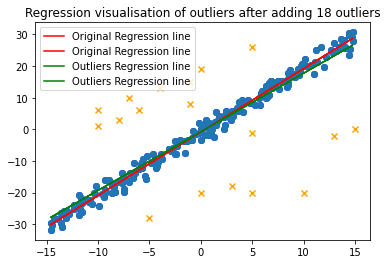

After adding 19 outliers : 
Original line slope : 2.000 , Original line intercept : -1.000
Original Regression slope : 2.003 , Outliers Regression slope : 1.828
Original Regression intercept : -0.845 , Outliers Regression intercept : -0.890
Original Regression score : 0.989 , Outliers Regression score : 0.835


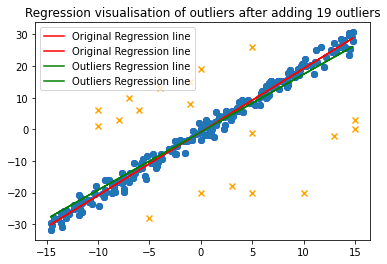

After adding 20 outliers : 
Original line slope : 2.000 , Original line intercept : -1.000
Original Regression slope : 2.003 , Outliers Regression slope : 1.825
Original Regression intercept : -0.845 , Outliers Regression intercept : -0.965
Original Regression score : 0.989 , Outliers Regression score : 0.830


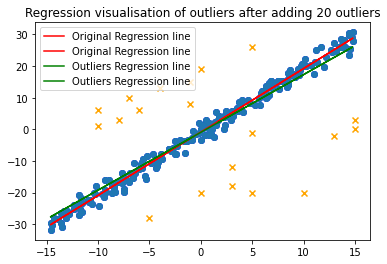

In [93]:
## We add each time one outlier and observe the effect
slopes = []
intercepts = []
scores = []

for i in range(1,len(outliers)+1):
    
    ## Adding i outlier
    x_outliers = np.array([outliers[j][0] for j in range(i)])
    y_outliers = np.array([outliers[j][1] for j in range(i)])
    Xo = np.concatenate((X[:,1],x_outliers), axis=0)
    yo = np.concatenate((y,y_outliers), axis=0)
    
    ## Fitting the regression line
    ao, bo, co = regression(Xo.reshape(-1,1), yo)
    print(f'After adding {i} outliers : ')
    print('Original line slope : %.3f' % s[1], ', Original line intercept : %.3f' % s[0])
    print('Original Regression slope : %.3f' % a, ', Outliers Regression slope : %.3f' % ao)
    print('Original Regression intercept : %.3f' % b, ', Outliers Regression intercept : %.3f' % bo)
    print('Original Regression score : %.3f' % c, ', Outliers Regression score : %.3f' % co)
    
    

    ## Appending the parameters to the lists
    slopes.append(ao)
    intercepts.append(bo)
    scores.append(co)
    
    ## Visualisation
    plt.scatter(X[:,1],y, c='blue')
    plt.scatter(x_outliers,y_outliers, c='orange', marker='x')
    plt.plot(X,a*X+b, c='red', label = 'Original Regression line')
    plt.plot(X,ao*X+bo, c='green', label = 'Outliers Regression line')
    plt.scatter(X[:,1],y)
    title = f'Regression visualisation of outliers after adding {i} outliers'
    plt.title(title)
    plt.legend()
    plt.show();
    
    
    
    


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


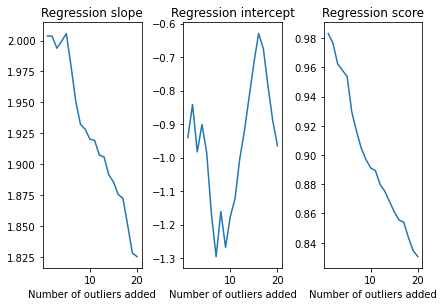

<Figure size 1600x1600 with 0 Axes>

In [108]:
# Visualisation of regression parameters



fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
plt.figure(figsize=(20, 20), dpi=80)
fig.tight_layout()


x = np.arange(20)+1

ax1.plot(x, slopes)
ax2.plot(x, intercepts)
ax3.plot(x, scores)

ax1.set_title('Regression slope')
ax2.set_title('Regression intercept')
ax3.set_title('Regression score')

ax1.set_xlabel('Number of outliers added')
ax2.set_xlabel('Number of outliers added')
ax3.set_xlabel('Number of outliers added')



plt.show();

##  Conclusion :

The regression slopes may or may not change strongly, it depends on the positions of the outliers, if 2 outliers are symetric with respect to the regression line then their effect on the slope cancels out.

Adding outliers always affect the regression score and make it smaller